In [10]:
# antes de empezar importamos la librería de NumPy para poder trabajar con todos sus métodos. 
import numpy as np

# importamos la pandas para poder trabajar en la lección
import pandas as pd

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest,levene, mannwhitneyu, chi2_contingency, ttest_ind,norm
import scipy.stats as st

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [4]:
df=pd.read_csv('hr_limpio.csv', index_col=0)

In [5]:
df.head(5)

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework,dailyrate,totalworkingyears
0,51,no,unknown,unknown,6.0,university,unknown,162.0,1,male,51,3,expert,research director,3,unknown,19537.0,6462,7,no,13,3.0,3,0,5,3.0,20,15,15,1972,yes,684.0,24.0
1,52,no,unknown,unknown,1.0,master degree,life sciences,259.0,3,male,65,2,expert,manager,3,unknown,19999.0,5678,0,unknown,14,3.0,1,1,5,3.0,33,11,9,1971,yes,699.0,34.0
2,42,no,travel_rarely,research & development,4.0,college,technical degree,319.0,3,male,58,3,expert,manager,4,married,19232.0,4933,1,no,11,3.0,4,0,3,3.0,22,11,15,1981,yes,532.0,22.0
3,47,no,travel_rarely,unknown,2.0,master degree,medical,unknown,1,female,82,3,advanced,research director,3,married,17169.0,26703,3,unknown,19,3.0,2,2,2,3.0,20,5,6,1976,no,359.0,11.8
4,46,no,unknown,unknown,3.0,university,technical degree,unknown,1,female,45,4,advanced,sales executive,1,divorced,unknown,7739,2,no,12,3.0,4,1,5,3.0,19,2,8,1977,no,1319.0,9.8


In [19]:
columnas_cat=['education','gender','remotework','joblevel', 'jobrole','distancefromhome',]

In [20]:
columnas_num=['percentsalaryhike','trainingtimeslastyear','yearssincelastpromotion']

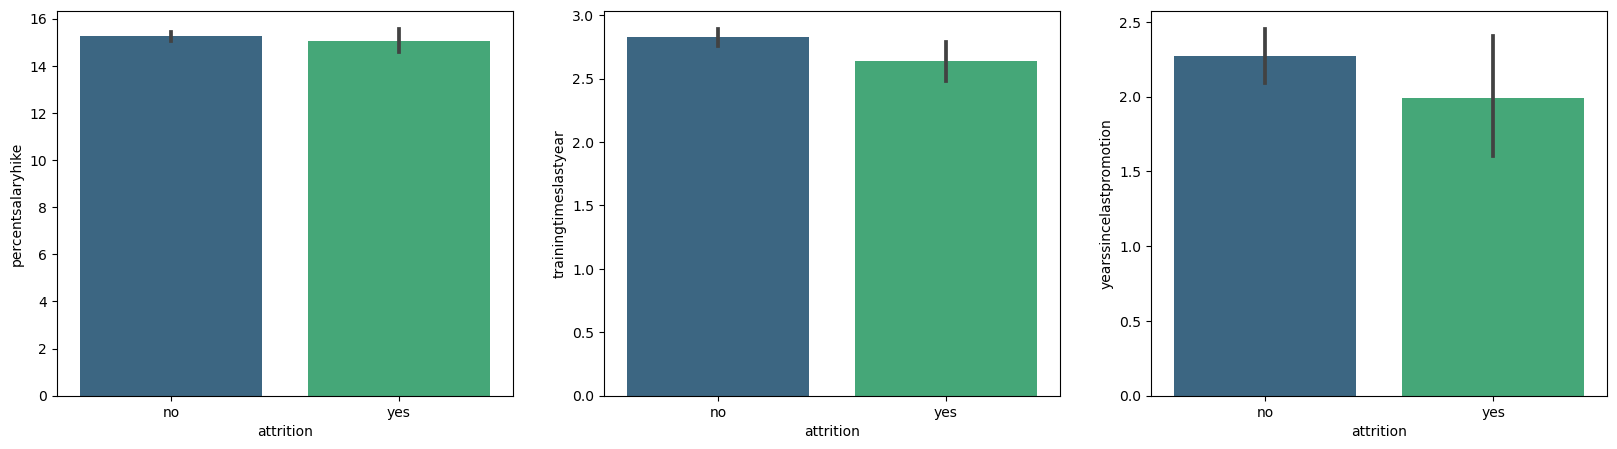

In [27]:
#Hacer un boxplot en bucle

fig, axes = plt.subplots(nrows  =1, ncols = 3, figsize =(20,5))

axes = axes.flat

for ind, col in enumerate(columnas_num):
    sns.barplot(x = "attrition", y = col,  data = df, ax = axes[ind],palette = "viridis")
    axes[ind].set_ylabel(col)

In [28]:
for col in columnas_num:
   # Calcular la media y la desviación estándar del grupo control
    media_control_z = df[df['attrition'] == 'yes'][col].mean()
    std_control_z = df[df['attrition'] == 'yes'][col].std()

    # Calcular la media y la desviación estándar del grupo control
    media_test_z = df[df['attrition'] == 'no'][col].mean()
    std_test_z = df[df['attrition'] == 'no'][col].std()

    # Calcular la cantidad de datos que tenemos en el grupo control y el test
    n_control_z = len(df[df['attrition'] == 'yes'])
    n_test_z = len(df[df['attrition'] == 'no'])

    # calcular el valor de la z
    z_stat = (media_test_z - media_control_z) / np.sqrt((std_control_z**2 / n_control_z) + (std_test_z**2 / n_test_z))

    # Calcular el valor p
    p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

    # Imprimir el resultado de la prueba
    alpha = 0.05
    if p_value < alpha:
        print(f"Hay una diferencia significativa en el tiempo de permanencia entre el grupo de control y el grupo de prueba. de la columna {col}")
        
        print("""
            Los resultados sugieren que si que existe una diferencia entre los grupos en la permanencia en la página web,
            por lo que tendremos quee optar por la nueva versión de la página web
            """)
        print("\n ---------- \n")
    else:
        print(f"No hay evidencia de una diferencia significativa en el tiempo de permanencia entre los grupos de la columna {col}.")
        
        print(""" 
            Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
            por lo que la nueva campaña no esta ayudando a nuestro problema. 
            """)
        print("\n ---------- \n")

No hay evidencia de una diferencia significativa en el tiempo de permanencia entre los grupos de la columna percentsalaryhike.
 
            Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
            por lo que la nueva campaña no esta ayudando a nuestro problema. 
            

 ---------- 

Hay una diferencia significativa en el tiempo de permanencia entre el grupo de control y el grupo de prueba. de la columna trainingtimeslastyear

            Los resultados sugieren que si que existe una diferencia entre los grupos en la permanencia en la página web,
            por lo que tendremos quee optar por la nueva versión de la página web
            

 ---------- 

No hay evidencia de una diferencia significativa en el tiempo de permanencia entre los grupos de la columna yearssincelastpromotion.
 
            Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son d

In [ ]:
def ab_testing(columnas):
    
    df_grupoA = df[df[columnas]== "grupo A"]
    tasa_grupoA_rotacion=np.round(df_grupoA[df_grupoA["attrition"]== "yes"].shape[0]/df_grupoA.shape[0],2)
    print(tasa_grupoA_rotacion)

    df_grupoB = df[df[columnas]== "grupo B"]
    tasa_grupoB_rotacion=np.round(df_grupoB[df_grupoB["attrition"]== "yes"].shape[0]/df_grupoB.shape[0],2)
    print(tasa_grupoB_rotacion)
     
    # Crear un DataFrame
    data_p_test = {
    'Grupo': ["Empleados Satisfechos", "Empleados Insatisfechos"],
    'Rotacion_si': [df_grupoA[df_grupoA["attrition"]== "yes"].shape[0]/df_grupoA.shape[0],df_grupoB[df_grupoB["attrition"]== "yes"].shape[0]/df_grupoB.shape[0]],
    'Rotacion_no': [df_grupoA[df_grupoA["attrition"]== "no"].shape[0]/df_grupoA.shape[0],df_grupoB[df_grupoB["attrition"]== "no"].shape[0]/df_grupoB.shape[0]]}

    df_p_test = pd.DataFrame(data_p_test)
    
    # hacemos un análisis visual previo
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

    sns.barplot(x="Grupo", y="Rotacion_si", data=df_p_test,  palette = "flare",ax = axes[0])
    sns.barplot(x="Grupo", y="Rotacion_no", data=df_p_test,  palette = "flare", ax = axes[1])

    axes[0].set_title(columnas)
    axes[1].set_title(columnas)
        
    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df_p_test['Grupo'], df_p_test['Rotacion_si'])

# Realizar la prueba de proporciones
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir el resultado de la prueba
    alpha = 0.05
    if p_value < alpha:
        print(f"Hay una diferencia significativa entre {columnas} y la rotación")
        print("""
            Los resultados sugieren que existe evidencia estadística para afirmar que los datos guardan relación. 
            """)
        print("\n ---------- \n")
    else:
        print(f"No hay una diferencia significativa entre {columnas} y la rotación.")
        print("""Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación""")
        print("\n ---------- \n")   

0.14
0.19
No hay una diferencia significativa entre job_satisfaction_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.13
0.2
No hay una diferencia significativa entre environment_satisfaction_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.15
0.17
No hay una diferencia significativa entre relationship_satisfaction_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.13
0.22
No hay una diferencia significativa entre job_involvement_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.15
0.19
No hay una diferencia significativa entre work_lifebalance_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar q

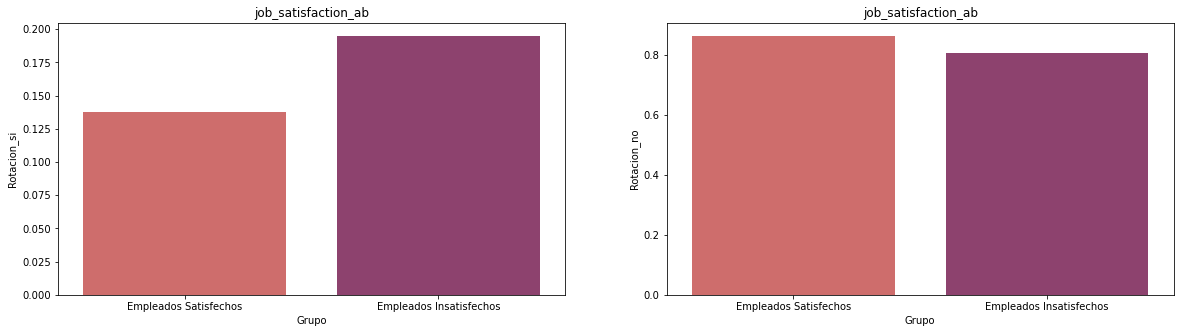

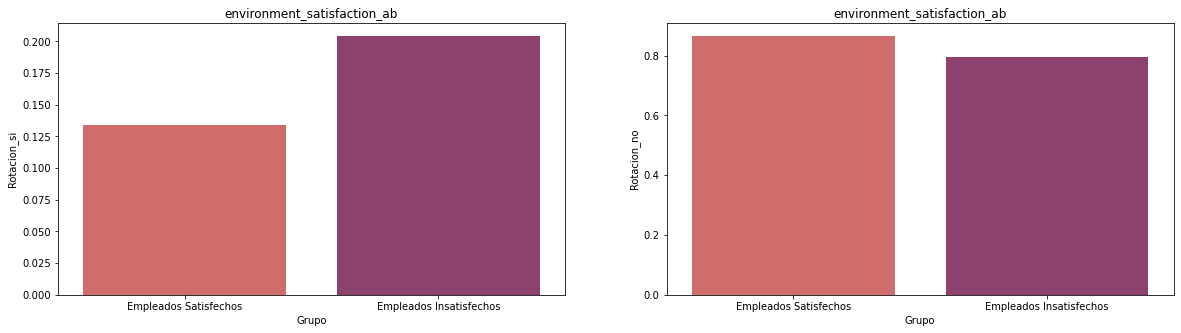

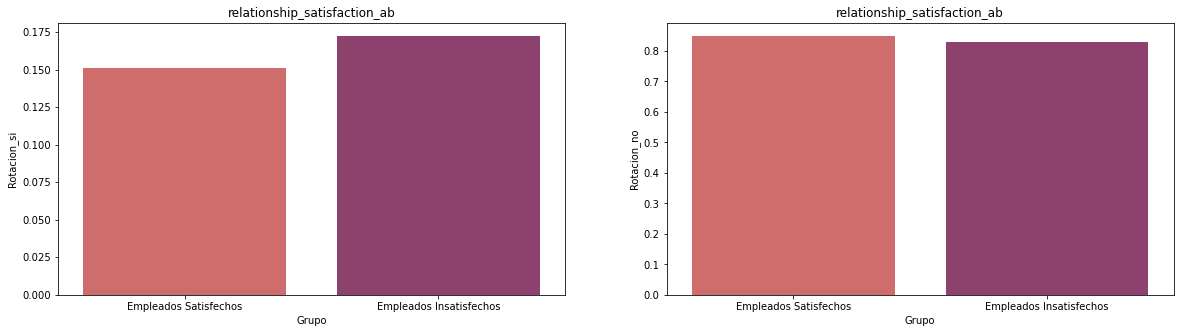

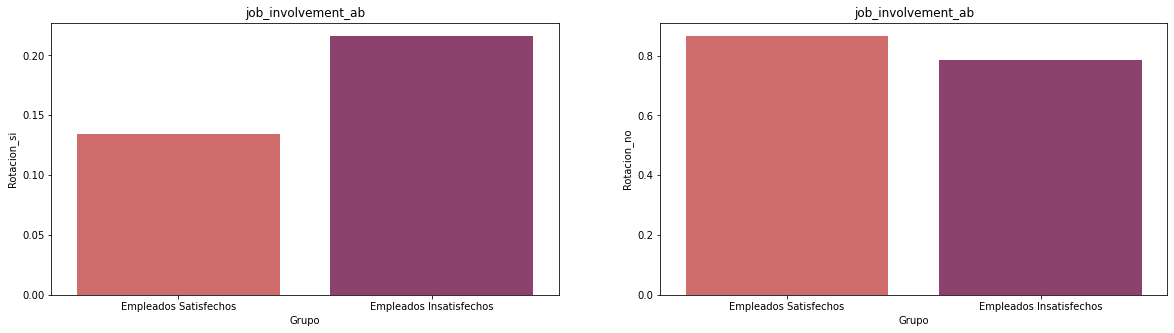

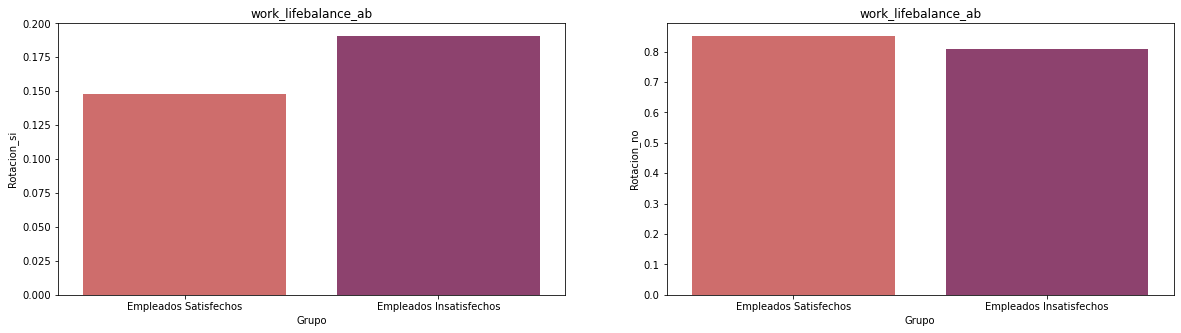

In [ ]:
for columna in columnas_ab:
    ab_testing(columna)